# Neural Networks
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **forward** and **backward** operations for different layers in neural networks
- implement a simple neural networks for classification

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_data = sio.loadmat('digit_data.mat')
X = digit_data['X']
y = digit_data['y']
_, num_cases = X.shape
train_num_cases = num_cases * 4 // 5
X = X.reshape((400, num_cases))
X = X.transpose()
# X has the shape of (number of samples, number of pixels)
train_data = X[:train_num_cases,:]
train_label = y[:, :train_num_cases]
test_data = X[train_num_cases:, :]
test_label = y[:, train_num_cases:]
weights = {}
weights['fully1_weight'] = np.random.randn(400, 25) / 400
weights['fully1_bias'] = np.random.rand(25, 1) 
weights['fully2_weight'] = np.random.randn(25, 10) / 25
weights['fully2_bias'] = np.random.rand(10, 1)


(5000, 400)
(1, 5000)
(400,)


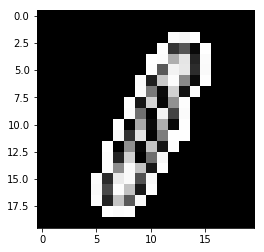

The digit number is 1.


In [6]:
print(X.shape)
print(y.shape)
idx = 1023
x_1 = X[idx, :] * 255
x_1 = x_1.astype(np.uint8)
print(x_1.shape)
plt.imshow(np.reshape(x_1, (20, 20)).T, cmap=plt.cm.gray)
plt.show()
print("The digit number is {}.".format(y[0, idx]))

## Training

In [ ]:
# training setting
weight_inc = {}
for name in ('fully1_weight', 'fully1_bias', 'fully2_weight', 'fully2_bias'):
    weight_inc[name] = np.zeros(weights[name].shape)
batch_size = 100
max_epoch = 10
momW = 0.9
wc = 0.0005
learning_rate = 0.1

# Training iterations
from get_new_weight_inc import get_new_weight_inc
from feedforward_backprop import feedforward_backprop

for epoch in range(max_epoch):
    for i in range(math.ceil(train_num_cases/batch_size)):
        data = train_data[i * batch_size:min((i + 1) * batch_size, train_num_cases), :]
        label = train_label[:, i * batch_size:min((i + 1) * batch_size, train_num_cases)]
        # The feedforward and backpropgation processes
        loss, accuracy, gradients = feedforward_backprop(data, label, weights)
        print('{:3}.{:2} loss:{:.3}, accuracy:{}'.format(epoch + 1, i + 1, loss, accuracy))
        # Updating weights
        for name in ('fully1_weight', 'fully1_bias', 'fully2_weight', 'fully2_bias'):
            weight_inc[name] = get_new_weight_inc(weight_inc[name], weights[name], momW, wc, learning_rate, gradients[name + '_grad'])
            weights[name] += weight_inc[name]
        

## Testing

In [ ]:
# TODO
loss, accuracy, _ = feedforward_backprop(test_data, test_label, weights)
print('loss:{:.3}, accuracy:{}'.format(loss, accuracy))